# Ejemplos MLPs

In [3]:
import numpy as np                      # NumPy para cálculo numérico vectorizado
import matplotlib.pyplot as plt   

## Funciónes de activación y perdida

In [4]:
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - np.tanh(x) ** 2

def mse(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

## Clase MLP de 1 capa oculta

In [ ]:
# Clase MLP: 1 capa oculta (3 neuronas), salida lineal
# ------------------------------------------------------------
class MLP1D:
    def __init__(self, hidden_units=3, seed=0):
        rng = np.random.default_rng(seed) # Generador de números aleatorios
        self.H = hidden_units # Número de neuronas en la capa oculta

        # Pesos y bias de la capa oculta
        self.W1 = rng.normal(scale=1.0, size=(self.H, 1))  # pesos de la capa oculta (H,1)
        self.b1 = np.zeros((self.H, 1))                    # bias (H,1)

        # Pesos y bias de la capa de salida
        self.W2 = rng.normal(scale=1.0, size=(1, self.H))  # pesos de la capa de salida (1,H)
        self.b2 = np.zeros((1, 1))                         # bias (1,1)

    def forward(self, x):
        """
        x: (N,1)
        Devuelve y_pred: (N,1) y cache con intermedios
        """
        a1 = self.W1 @ x.T + self.b1   # combinación lineal de entradas -> (H,N)
        z1 = tanh(a1)                  # activación no lineal -> (H,N)
        a2 = self.W2 @ z1 + self.b2    # combinación lineal de ocultas -> (1,N)
        y_pred = a2.T                  # salida final -> (N,1)
        cache = (x, a1, z1, a2, y_pred)
        return y_pred, cache

    def backward(self, cache, y_true): # Calcula los gradientes de la función de pérdida respecto a los parámetros para poder entrenar con descenso de gradiente.
        x, a1, z1, a2, y_pred = cache
        N = x.shape[0]

        dy = (2.0 / N) * (y_pred - y_true)  # dy: gradiente respecto a la salida (N,1)
        da2 = dy.T                          # (1,N)

        dW2 = da2 @ z1.T                    # dW2, db2: cómo cambiar los pesos/bias de la capa de salida. (1,H)
        db2 = np.sum(da2, axis=1, keepdims=True)  # (1,1)

        dz1 = self.W2.T @ da2               # da1, dW1, db1: cómo cambiar los pesos/bias de la capa oculta, usando la regla de la cadena y la derivada de tanh.

        da1 = dz1 * dtanh(a1)               # (H,N)

        dW1 = da1 @ x                       # (H,1)
        db1 = np.sum(da1, axis=1, keepdims=True)  # (H,1)

        return dW1, db1, dW2, db2

    def step(self, grads, lr): #Actualiza todos los parámetros con el gradiente descendente.
	#lr = learning rate (qué tan grandes son los pasos de ajuste).
        dW1, db1, dW2, db2 = grads
        self.W1 -= lr * dW1
        self.b1 -= lr * db1
        self.W2 -= lr * dW2
        self.b2 -= lr * db2

In [9]:
# Datos de entrenamiento para las 4 funciones
# ------------------------------------------------------------
def generar_datos(func, N=50, seed=0):
    rng = np.random.default_rng(seed)
    x = rng.uniform(-1.0, 1.0, size=(N, 1))

    if func == "cuadrado":
        y = x**2
    elif func == "seno":
        y = np.sin(x)
    elif func == "absoluto":
        y = np.abs(x)
    elif func == "heaviside":
        y = (x > 0).astype(float)
    else:
        raise ValueError("Función no reconocida")

    return x, y

# ------------------------------------------------------------
# Entrenamiento y gráficas
# ------------------------------------------------------------
def entrenar_y_graficar(func, epochs=5000, lr=0.05, seed=0):
    x, y = generar_datos(func, N=50, seed=seed)
    mlp = MLP1D(seed=seed)

    for ep in range(epochs):
        y_pred, cache = mlp.forward(x)
        loss = mse(y_pred, y)
        grads = mlp.backward(cache, y)
        mlp.step(grads, lr)

        if ep % 1000 == 0:
            print(f"[{func}] Época {ep}, Loss={loss:.5f}")

    # Malla para graficar
    xx = np.linspace(-1.1, 1.1, 400).reshape(-1, 1)
    yy, cache_grid = mlp.forward(xx)
    _, a1g, z1g, _, _ = cache_grid

    # Gráfica
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, c="blue", label="Datos")
    plt.plot(xx, yy, "r-", linewidth=2, label="MLP salida")
    for j in range(mlp.H):
        plt.plot(xx, z1g[j, :], "--", label=f"z{j+1}(x)")
    plt.title(f"Aproximación MLP a f(x)={func}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend()
    plt.show()

[cuadrado] Época 0, Loss=0.20324
[cuadrado] Época 1000, Loss=0.00274
[cuadrado] Época 2000, Loss=0.00205
[cuadrado] Época 3000, Loss=0.00167
[cuadrado] Época 4000, Loss=0.00139


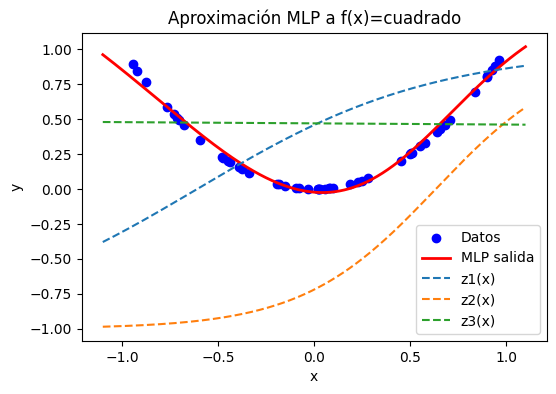

[seno] Época 0, Loss=2.09630
[seno] Época 1000, Loss=0.00006
[seno] Época 2000, Loss=0.00004
[seno] Época 3000, Loss=0.00003
[seno] Época 4000, Loss=0.00002


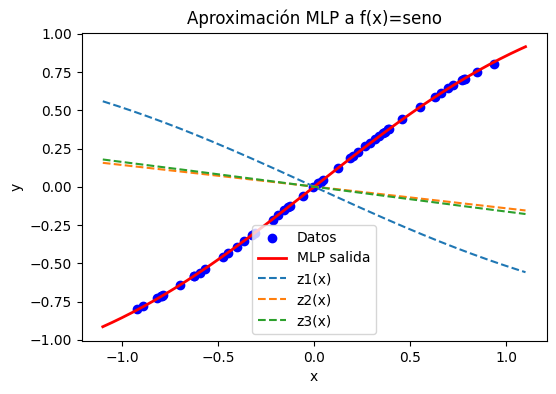

[absoluto] Época 0, Loss=0.31732
[absoluto] Época 1000, Loss=0.00168
[absoluto] Época 2000, Loss=0.00121
[absoluto] Época 3000, Loss=0.00095
[absoluto] Época 4000, Loss=0.00082
[absoluto] Época 5000, Loss=0.00075


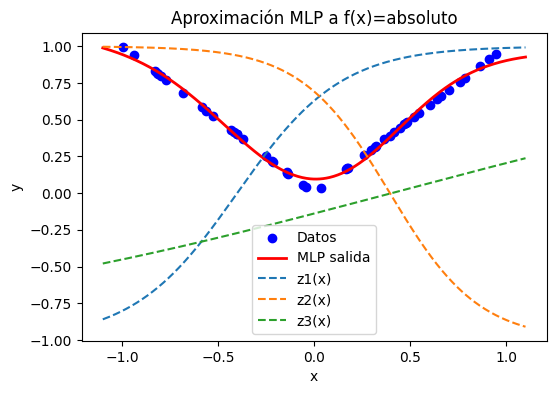

[heaviside] Época 0, Loss=0.63754
[heaviside] Época 1000, Loss=0.05600
[heaviside] Época 2000, Loss=0.04319
[heaviside] Época 3000, Loss=0.03929
[heaviside] Época 4000, Loss=0.03840
[heaviside] Época 5000, Loss=0.03784
[heaviside] Época 6000, Loss=0.03730
[heaviside] Época 7000, Loss=0.03676


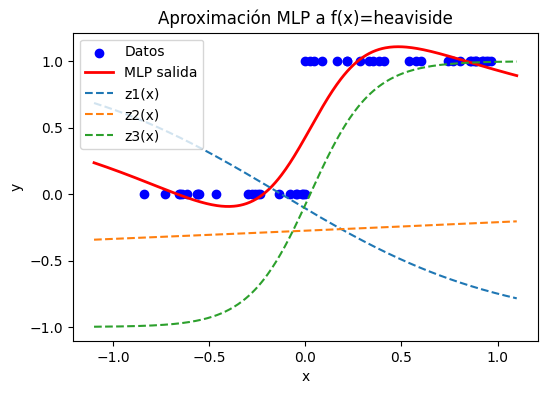

In [10]:
# Ejecutar los cuatro ejemplos
# ------------------------------------------------------------
if __name__ == "__main__":
    entrenar_y_graficar("cuadrado",  epochs=5000, lr=0.05, seed=1)
    entrenar_y_graficar("seno",      epochs=5000, lr=0.05, seed=2)
    entrenar_y_graficar("absoluto",  epochs=6000, lr=0.05, seed=3)
    entrenar_y_graficar("heaviside", epochs=8000, lr=0.03, seed=4)